# Graph Using mplfinance with Points
## 薛祖恩
建檔日期：2020/12/15

最近更新日期：2020/12/24

# 內容介紹：
## Part2 策略使用、找 / 畫出交易點、計算報酬

## (1) 移動平均線 (投資報酬率6.58%)

## (2) MACD指標 (投資報酬率15.92%)

## (3) KD指標 (投資報酬率11.44%)

## (4) 布林通道 (投資報酬率4.81%)

## (5) RSI指標 (投資報酬率37.15%)

-------------------------------------------------------------------------------------------------------------------------------

# 備註：

## 買賣股票收稅模式：
## 買進：手續費率 = 0.1425% = 0.001425
## 賣出：手續費率 + 交易稅率 = 0.1425% + 0.3% = 0.4425% = 0.004425
#### 買入成交價 * 1.001425
#### 賣出成交價 * (1 - 0.004425) = * 0.995575

-------------------------------------------------------------------------------------------------------------------------------

## Markers:
### https://matplotlib.org/3.1.1/api/markers_api.html

## Colors:
### https://matplotlib.org/3.3.3/gallery/color/named_colors.html

-------------------------------------------------------------------------------------------------------------------------------

# 2-1 移動平均線

## >>> 買入點：
### 5日線突破10日線買入

## >>> 賣出點：
### 10日線突破5日線賣出

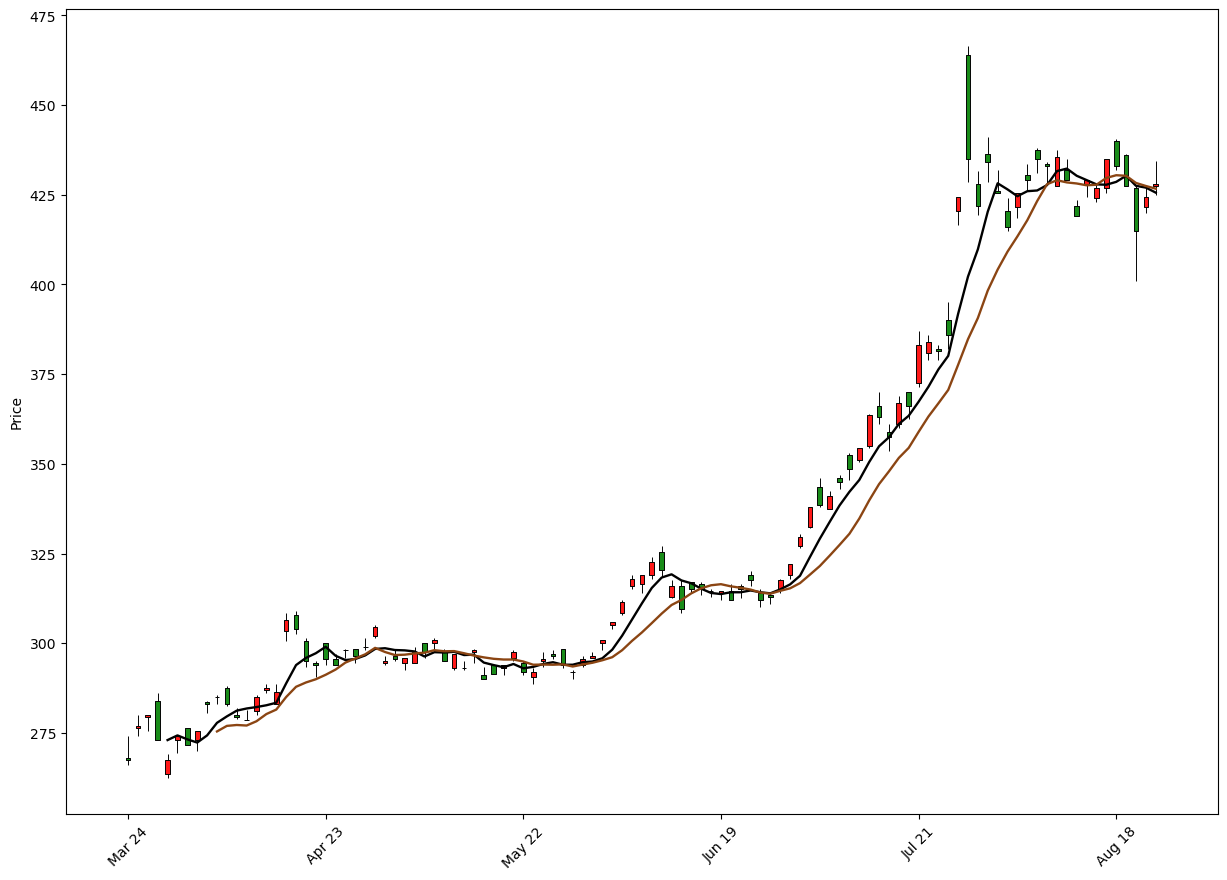

In [13]:
#Part1 介紹的自製移動平均線
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks[50:155]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', figscale = 2, style = styleSet)

stocks_close = [line for line in stocks['Close']]

def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

addplots = [
            mpf.make_addplot(making_averages(5), color = 'black'),
            mpf.make_addplot(making_averages(10), color = 'saddlebrown')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots)

In [5]:
#畫點！
import numpy as np
import pandas as pd
import mplfinance as mpf
from datetime import datetime

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks[50:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', figscale = 2, style = styleSet)

stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]

def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

################################################################################################################################

#策略實現
FiveMav = making_averages(5)    #宣告串列 -> 5日線
TenMav = making_averages(10)    #宣告串列 -> 10日線

#繪製點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點

for i in range(11, len(stocks)):
    if(FiveMav[i - 1] < TenMav[i - 1] and FiveMav[i] > TenMav[i]):
        #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
        points_buy[i] = stocks_low[i] * 0.98
        
    if(FiveMav[i - 1] > TenMav[i - 1] and FiveMav[i] < TenMav[i]):
        #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
        points_sell[i] = stocks_high[i] * 1.02

#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(FiveMav, color = 'black'),
            mpf.make_addplot(TenMav, color = 'saddlebrown')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots)

支出： 1930748 元
收入： 2055365 元
淨收益： 124617 元
投資報酬率： 6.45 %


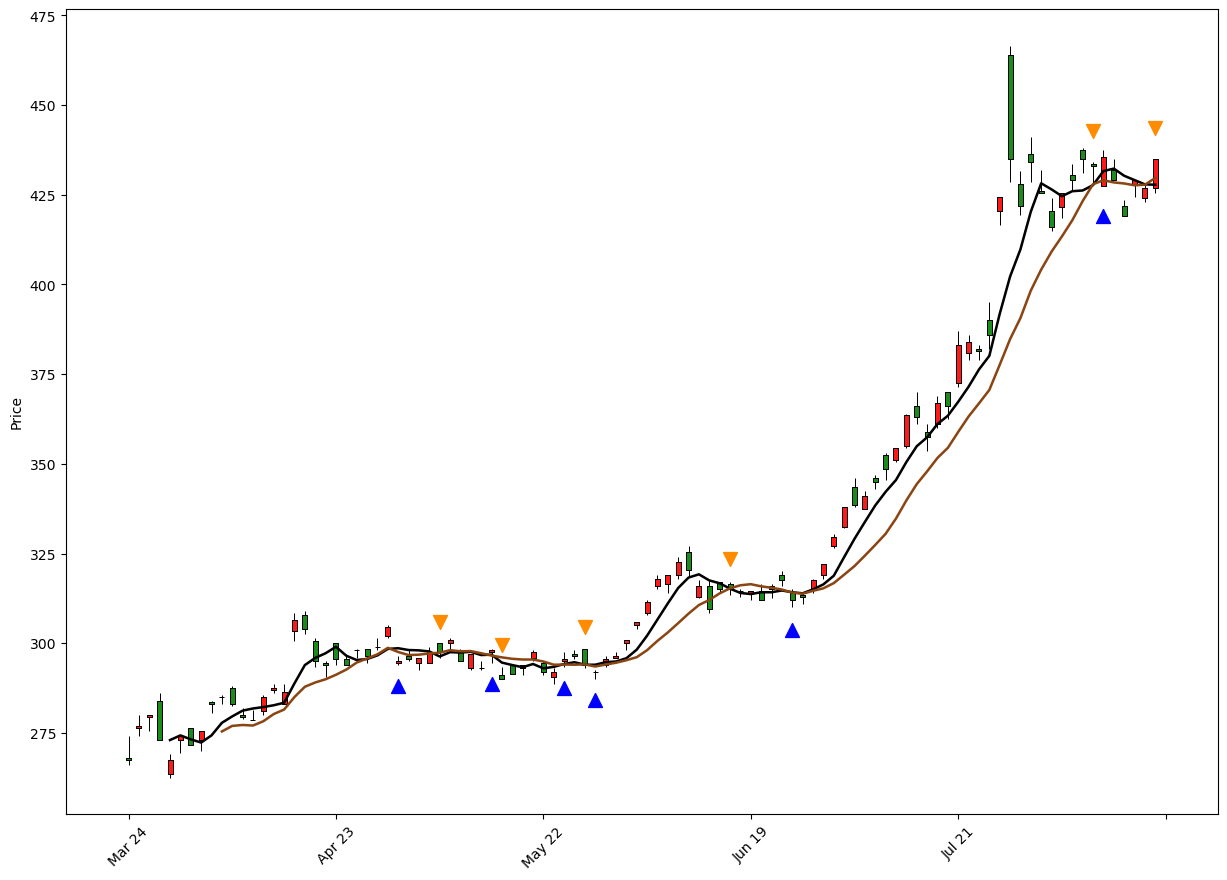

0         1      2      3        4        5
0     日期  買/賣(+/-)     價格  價格(稅)     實際花費     目前獲利
1    5/4        +1    295  295.4  -295420  -295420
2    5/8        -1  297.5    296  +296184      764
3   5/15        +1    298  298.4  -298425  -297661
4   5/18        -1    290    289  +288717    -8944
5   5/26        +1  295.5  295.9  -295921  -304865
6   5/28        -1    294    293  +292699   -12166
7   5/29        +1    292  292.4  -292416  -304582
8   6/17        -1    315    314  +313606     9024
9   6/29        +1    312  312.4  -312445  -303421
10   8/7        -1    433    431  +431084   127663
11  8/10        +1  435.5  436.1  -436121  -308458
12  8/17        -1    435    433  +433075   124617

In [18]:
#畫點 & 計算！
import numpy as np
import pandas as pd
import mplfinance as mpf
from datetime import datetime

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks[50:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', figscale = 2, style = styleSet)

stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]

def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

################################################################################################################################

#策略實現
FiveMav = making_averages(5)    #宣告串列 -> 5日線
TenMav = making_averages(10)    #宣告串列 -> 10日線

#繪製點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點

#股票張數
stock = 0

#每次購入張數
unit = 1

#目前獲利
gain = 0

#紀錄交易資訊
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]

#暫時交易資訊
temp_detail = []

for i in range(11, len(stocks)):
    if(FiveMav[i - 1] < TenMav[i - 1] and FiveMav[i] > TenMav[i]):
        #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
        points_buy[i] = stocks_low[i] * 0.98
        #淨收益計算
        gain -= round(stocks_close[i] * 1.001425 * unit * 1000)
        #交易資訊
        temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' +
                           str(datetime.date(stocks['Date'][i]).day))
        temp_detail.append('+' + str(unit))                                            #買賣 unit張，這邊假設為 1
        stock += unit                                                                  #股票張數 + unit張
        temp_detail.append(stocks_close[i])                                            #購買日買入價格，這邊假設為收盤價
        temp_detail.append(round(stocks_close[i] * 1.001425, 1))                       #抽稅之後的價格
        temp_detail.append('-' + str(round(stocks_close[i] * 1.001425 * unit * 1000))) #實際花費 (四捨五入到個位數)
        temp_detail.append(gain)                                                       #目前獲利
        detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
        temp_detail = []                                                               #清除暫存交易資訊   
        
    if(FiveMav[i - 1] > TenMav[i - 1] and FiveMav[i] < TenMav[i] and stock > 0):
        #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
        points_sell[i] = stocks_high[i] * 1.02
        #淨收益計算
        gain += round(stocks_close[i] * 0.995575 * stock * 1000)
        #交易資
        temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' +
                           str(datetime.date(stocks['Date'][i]).day))
        temp_detail.append('-' + str(stock))                                           #股票全部賣出
        temp_detail.append(stocks_close[i])                                            #賣出日賣出價格，這邊假設為收盤價
        temp_detail.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格
        temp_detail.append('+' + str(round(stocks_close[i] * 0.995575 * stock * 1000)))#實際收入 (四捨五入到個位數)
        temp_detail.append(gain)                                                       #目前獲利
        stock = 0                                                                      #因為全部股票賣出，所以當前股票張數歸零
        detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
        temp_detail = []                                                               #清除暫存交易資訊   
         
#支出
cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4])) #取絕對值
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])
        
#支出、收入、淨收益、投資報酬率
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")        

#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(FiveMav, color = 'black'),
            mpf.make_addplot(TenMav, color = 'saddlebrown')
           ]

mpf.plot(stocks, **kwargs, addplot = addplots)

detail = pd.DataFrame(detail)
detail

-------------------------------------------------------------------------------------------------------------------------------

# 2-2 MACD指標

## >>> 買入點：
### 快線向上突破慢線買入

## >>> 賣出點：
### 慢線向下突破快線買入

In [27]:
#Part1 介紹的自製MACD指標
import pandas as pd
import mplfinance as mpf
import numpy as np

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks = stocks[50:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

stocks_close = [float(line) for line in stocks['Close']]

#製作MACD圖
ema12 = stocks['Close'].ewm(span = 12, adjust = False).mean() #12日移動平均線
ema26 = stocks['Close'].ewm(span = 26, adjust = False).mean() #26日移動平均線
DIF  = ema12 - ema26                                          #快線
DEM = DIF.ewm(span = 9, adjust = False).mean()                #慢線

#為了讓柱狀圖有不一樣顏色，分開成兩個不同的list，一個存正數，一個存負數
BAR = DIF - DEM  
BAR[BAR < 0] = None  
BAR_positive = BAR
BAR = DIF - DEM  
BAR[BAR >= 0] = None  
BAR_negative = BAR

draw = [
            mpf.make_addplot(BAR_negative, type = 'bar', panel = 1, color = 'limegreen', secondary_y = True),
            mpf.make_addplot(BAR_positive, type = 'bar', panel = 1, color = 'red', secondary_y = True),
            mpf.make_addplot(DIF, panel = 1, color = 'red', ylabel = 'MACD'),
            mpf.make_addplot(DEM, panel = 1, color = 'blue'),
       ]
        
mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (1.5, 0.8))

In [19]:
#Part1 介紹的自製MACD指標
import pandas as pd
import mplfinance as mpf
import numpy as np

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks = stocks[50:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

stocks_close = [float(line) for line in stocks['Close']]
stocks_low = [float(line) for line in stocks['Low']]
stocks_high = [float(line) for line in stocks['High']]

#製作MACD圖
ema12 = stocks['Close'].ewm(span = 12, adjust = False).mean() #12日移動平均線
ema26 = stocks['Close'].ewm(span = 26, adjust = False).mean() #26日移動平均線
DIF  = ema12 - ema26                                          #快線
DEM = DIF.ewm(span = 9, adjust = False).mean()                #慢線

#為了讓柱狀圖有不一樣顏色，分開成兩個不同的list，一個存正數，一個存負數
BAR = DIF - DEM  
BAR[BAR < 0] = None  
BAR_positive = BAR
BAR = DIF - DEM  
BAR[BAR >= 0] = None  
BAR_negative = BAR

################################################################################################################################

#繪製點所使用的串列 (初始化)
points_buy = [np.nan] * (len(stocks))    #買入點
points_sell = [np.nan] * (len(stocks))   #賣出點

for i in range(1, len(stocks['Date'])):
    #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
    if(DIF[i] > DEM[i] and DIF[i - 1] < DEM[i - 1]):   
        points_buy[i] = stocks_low[i] * 0.98
        
    #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
    elif(DIF[i] < DEM[i] and DIF[i - 1] > DEM[i - 1]): 
        points_sell[i] = stocks_high[i] * 1.02
        
#點狀圖 type = 'scatter'，markersize可以更改 marker大小
draw = [
            mpf.make_addplot(BAR_negative, type = 'bar', panel = 1, color = 'limegreen', secondary_y = True),
            mpf.make_addplot(BAR_positive, type = 'bar', panel = 1, color = 'red', secondary_y = True),
            mpf.make_addplot(DIF, panel = 1, color = 'red', ylabel = 'MACD'),
            mpf.make_addplot(DEM, panel = 1, color = 'blue'),
            mpf.make_addplot(points_buy, type = 'scatter', marker = '^', markersize = 100, color = 'blue'),
            mpf.make_addplot(points_sell, type = 'scatter', marker = 'v', markersize = 100, color = 'darkorange'),
       ]
        
mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (1.5, 0.8))

支出： 6364055 元
收入： 7377211 元
淨收益： 1013156 元
投資報酬率： 15.92 %


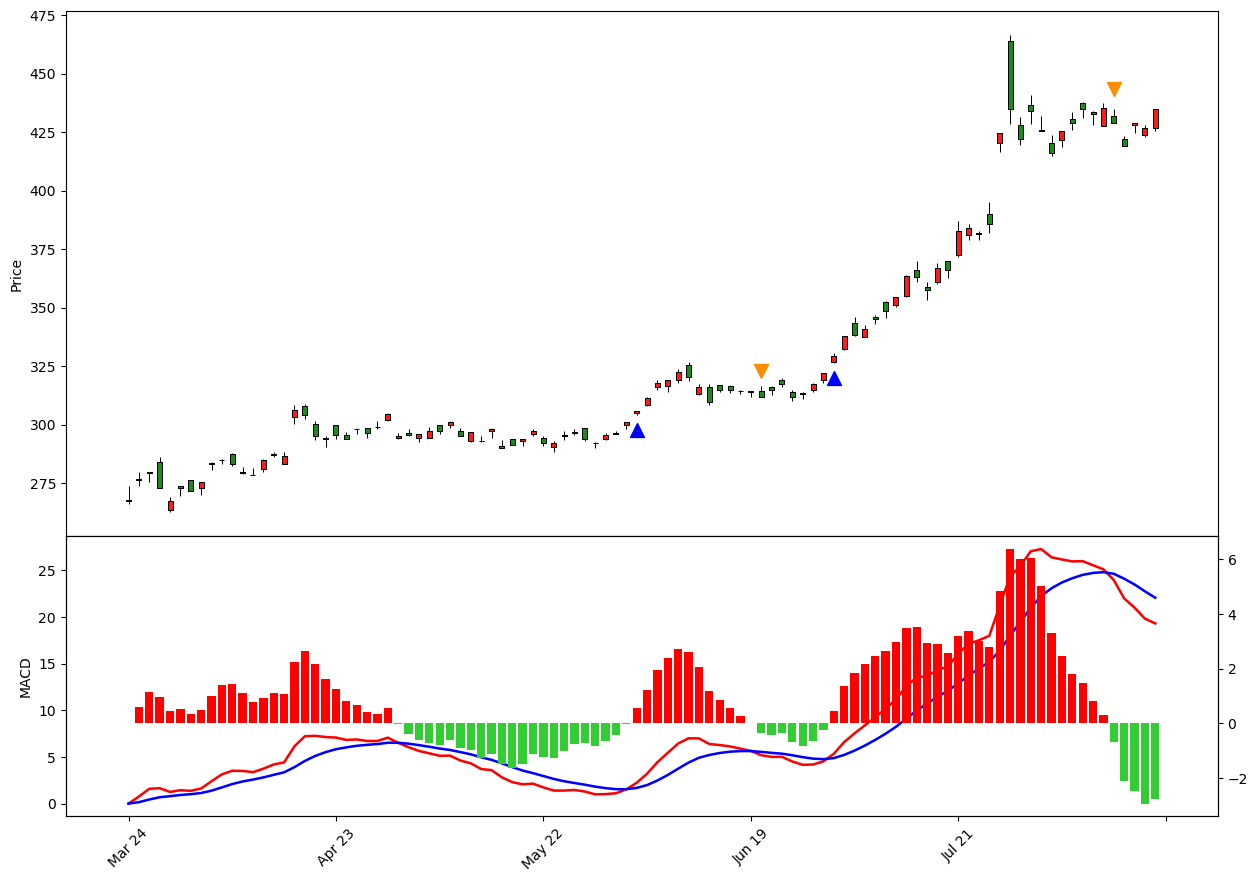

0         1      2      3         4         5
0    日期  買/賣(+/-)     價格  價格(稅)      實際花費      目前獲利
1   6/4       +10    306  306.4  -3064360  -3064360
2  6/22       -10    312  310.6  +3106194     41834
3   7/3       +10  329.5    330  -3299695  -3257861
4  8/11       -10    429  427.1  +4271017   1013156

In [27]:
#Part1 介紹的自製MACD指標
import pandas as pd
import mplfinance as mpf
import numpy as np
from datetime import datetime

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks = stocks[50:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

stocks_close = [float(line) for line in stocks['Close']]
stocks_low = [float(line) for line in stocks['Low']]
stocks_high = [float(line) for line in stocks['High']]

#製作MACD圖
ema12 = stocks['Close'].ewm(span = 12, adjust = False).mean() #12日移動平均線
ema26 = stocks['Close'].ewm(span = 26, adjust = False).mean() #26日移動平均線
DIF  = ema12 - ema26                                          #快線
DEM = DIF.ewm(span = 9, adjust = False).mean()                #慢線

#為了讓柱狀圖有不一樣顏色，分開成兩個不同的list，一個存正數，一個存負數
BAR = DIF - DEM  
BAR[BAR < 0] = None  
BAR_positive = BAR
BAR = DIF - DEM  
BAR[BAR >= 0] = None  
BAR_negative = BAR
################################################################################################################################
#策略實現

#繪製點所使用的串列 (初始化)
points_buy = [np.nan] * (len(stocks))    #買入點
points_sell = [np.nan] * (len(stocks))   #賣出點

#股票張數
stock = 0

#紀錄交易資訊
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]

#暫時交易資訊
temp_detail = []

#每次購入張數
unit = 10

#目前獲利
gain = 0

for i in range(1, len(stocks['Date'])):
    if(DIF[i] > DEM[i] and DIF[i - 1] < DEM[i - 1]):   
        #標買入點 ， 購買日最低價 * 0.98方便觀看
        points_buy[i] = stocks_low[i] * 0.98
        #淨收益計算
        gain -= round(unit * stocks_close[i] * 1000 * 1.001425)
        #買入unit張股票
        stock += unit
        #紀錄交易資訊
        temp_detail.append( str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day) )
        temp_detail.append('+' + str(unit))
        temp_detail.append(stocks_close[i])
        temp_detail.append(round(stocks_close[i] * 1.001425, 1))
        temp_detail.append('-' + str(round(unit * stocks_close[i] * 1000 * 1.001425)))
        temp_detail.append(gain)
        detail.append(temp_detail)
        temp_detail = []
        
    elif(DIF[i] < DEM[i] and DIF[i - 1] > DEM[i - 1] and stock > 0): 
        #標賣出點 ， 賣出日最高價 * 1.02方便觀看
        points_sell[i] = stocks_high[i] * 1.02
        #淨收益計算
        gain += round(stock * stocks_close[i] * 1000 * 0.995575)
        #紀錄交易資訊
        temp_detail.append( str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day) )
        temp_detail.append('-' + str(stock))
        temp_detail.append(stocks_close[i])
        temp_detail.append(round(stocks_close[i] * 0.995575, 1))
        temp_detail.append('+' + str(round(stock * stocks_close[i] * 1000 * 0.995575)))
        temp_detail.append(gain)
        detail.append(temp_detail)
        #股票全數賣出
        stock = 0
        temp_detail = []

#支出
cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4]))
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])

#總資訊
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")

#點狀圖 type = 'scatter'，markersize可以更改 marker大小
draw = [
            mpf.make_addplot(BAR_negative, type = 'bar', panel = 1, color = 'limegreen', secondary_y = True),
            mpf.make_addplot(BAR_positive, type = 'bar', panel = 1, color = 'red', secondary_y = True),
            mpf.make_addplot(DIF, panel = 1, color = 'red', ylabel = 'MACD'),
            mpf.make_addplot(DEM, panel = 1, color = 'blue'),
            mpf.make_addplot(points_buy, type = 'scatter', marker = '^', markersize = 100, color = 'blue'),
            mpf.make_addplot(points_sell, type = 'scatter', marker = 'v', markersize = 100, color = 'darkorange')
       ]
        
mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (1.5, 0.8))

#交易資訊
detail = pd.DataFrame(detail)

detail

-------------------------------------------------------------------------------------------------------------------------------

# 2-3 KD指標

## >>> 買入點：
### K線向上突破D線 2百分比

## >>> 賣出點：
### K線向下突破D線 2百分比

In [28]:
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks[50:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

#KD K為快線、D為慢線
stocks_close = [float(line) for line in stocks['Close']] #收盤價
stocks_high = [float(line) for line in stocks['High']]   #最高價
stocks_low = [float(line) for line in stocks['Low']]     #最低價
rsv = []                                                 #RSV list
Kpoint = [50]                                            #K值 list
Dpoint = [50]                                            #D值 list

#最近12天的 KD指標
#計算 RSV
for i in range(11, len(stocks['Date'])):
    low = min(stocks_low[i-11 : i+1])
    high = max(stocks_high[i-11 : i+1])
    rsv.append(round(100 * ((stocks_close[i] - low) / (high - low)), 2))
    
#計算 K值和 D值
for i in range(0, len(rsv) - 1):
    Kpoint.append(round((Kpoint[i] * (2 / 3) + rsv[i + 1] * (1 / 3)), 2))
    Dpoint.append(round((Dpoint[i] * (2 / 3) + Kpoint[i + 1] * (1 / 3)), 2))
    
#補 0
for i in range(0, 11):
    Kpoint.insert(i, np.nan)
    Dpoint.insert(i, np.nan)
    
draw = [
        mpf.make_addplot(Kpoint, panel = 1, color = 'red', ylabel = 'KD'), 
        mpf.make_addplot(Dpoint, panel = 1, color = 'blue'), 
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (1.5, 0.8))

In [29]:
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks[50:149]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

#KD K為快線、D為慢線
stocks_close = [float(line) for line in stocks['Close']] #收盤價
stocks_high = [float(line) for line in stocks['High']]   #最高價
stocks_low = [float(line) for line in stocks['Low']]     #最低價
rsv = []                                                 #RSV list
Kpoint = [50]                                            #K值 list
Dpoint = [50]                                            #D值 list

#最近12天的 KD指標
#計算 RSV
for i in range(11, len(stocks['Date'])):
    low = min(stocks_low[i-11 : i+1])
    high = max(stocks_high[i-11 : i+1])
    rsv.append(round(100 * ((stocks_close[i] - low) / (high - low)), 2))
    
#計算K值和 D值
for i in range(0, len(rsv) - 1):
    Kpoint.append(round((Kpoint[i] * (2 / 3) + rsv[i + 1] * (1 / 3)), 2))
    Dpoint.append(round((Dpoint[i] * (2 / 3) + Kpoint[i + 1] * (1 / 3)), 2))
    
#補 0
for i in range(0, 11):
    Kpoint.insert(i, np.nan)
    Dpoint.insert(i, np.nan)

################################################################################################################################
#策略實現

#繪製點所使用的串列 (初始化) (for上面的圖)
points_buy = [np.nan] * len(stocks)
points_sell = [np.nan] * len(stocks)

#繪製點所使用的串列 (初始化) (for下面的圖)
p_buy = [np.nan] * len(stocks)
p_sell = [np.nan] * len(stocks)

for i in range(1, len(Kpoint)):
    #買入點 (如果 K線突破 D線 3百分比) * 0.98 方便觀看
    if(Kpoint[i - 1] < Dpoint[i - 1] and Kpoint[i] > Dpoint[i] + 3):
        points_buy[i] = stocks_low[i] * 0.98
        p_buy[i] = Kpoint[i]
    #賣出點 (如果 D線突破 K線 3百分比) * 1.02 方便觀看
    elif(Kpoint[i - 1] > Dpoint[i - 1] and Kpoint[i] + 3 < Dpoint[i]):
        points_sell[i] = stocks_high[i] * 1.02
        p_sell[i] = Kpoint[i]
        
#點狀圖 type = 'scatter'，markersize可以更改 marker大小
draw = [
        mpf.make_addplot(points_buy, type = 'scatter', marker = '^', markersize = 100, color = 'blue'),
        mpf.make_addplot(points_sell, type = 'scatter', marker = 'v', markersize = 100, color = 'darkorange'),
        mpf.make_addplot(Kpoint, panel = 1, color = 'red'), 
        mpf.make_addplot(Dpoint, panel = 1, color = 'blue'),
        mpf.make_addplot(p_buy, type = 'scatter', panel = 1, color = 'blue', markersize = 50),
        mpf.make_addplot(p_sell, type = 'scatter', panel = 1, color = 'darkorange', markersize = 50)
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (1.5, 0.8))

In [32]:
import numpy as np
import pandas as pd
import mplfinance as mpf

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks[50:149]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

#KD K為快線、D為慢線
stocks_close = [float(line) for line in stocks['Close']] #收盤價
stocks_high = [float(line) for line in stocks['High']]   #最高價
stocks_low = [float(line) for line in stocks['Low']]     #最低價
rsv = []                                                 #RSV list
Kpoint = [50]                                            #K值 list
Dpoint = [50]                                            #D值 list

#最近12天的 KD指標
#計算 RSV
for i in range(11, len(stocks['Date'])):
    low = min(stocks_low[i-11 : i+1])
    high = max(stocks_high[i-11 : i+1])
    rsv.append(round(100 * ((stocks_close[i] - low) / (high - low)), 2))
    
#計算K值和 D值
for i in range(0, len(rsv) - 1):
    Kpoint.append(round((Kpoint[i] * (2 / 3) + rsv[i + 1] * (1 / 3)), 2))
    Dpoint.append(round((Dpoint[i] * (2 / 3) + Kpoint[i + 1] * (1 / 3)), 2))
    
#補 0
for i in range(0, 11):
    Kpoint.insert(i, np.nan)
    Dpoint.insert(i, np.nan)

################################################################################################################################
#策略實現

#交易點串列
points_buy = [np.nan] * len(stocks)
points_sell = [np.nan] * len(stocks)
p_buy = [np.nan] * len(stocks)
p_sell = [np.nan] * len(stocks)

#紀錄交易資訊
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]
temp_detail = []

#單次買入張數
unit = 10

#股票張數
stock = 0

#目前獲利
gain = 0

for i in range(1, len(Kpoint)):
    #買入點 (如果 K線突破 D線 3百分比) 購買日最低價 * 0.98 方便觀看
    if(Kpoint[i - 1] < Dpoint[i - 1] and Kpoint[i] > Dpoint[i] + 3):
        points_buy[i] = stocks_low[i] * 0.98
        p_buy[i] = Kpoint[i]
        #買入unit張股票
        stock += unit
        #計算目前獲利
        gain -= round(unit * stocks_close[i] * 1000 * 1.001425)
        #紀錄交易資訊
        temp_detail.append( str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day) )
        temp_detail.append('+' + str(unit))
        temp_detail.append(stocks_close[i])
        temp_detail.append(round(stocks_close[i] * 1.001425, 1))
        temp_detail.append('-' + str(round(unit * stocks_close[i] * 1000 * 1.001425)))
        temp_detail.append(gain)
        detail.append(temp_detail)
        temp_detail = []
        
    #賣出點 (如果 D線突破 K線 3百分比) 賣出日最高價 * 1.02 方便觀看
    elif(Kpoint[i - 1] > Dpoint[i - 1] and Kpoint[i] + 3 < Dpoint[i] and stock > 0):
        points_sell[i] = stocks_high[i] * 1.02
        p_sell[i] = Kpoint[i]
        #計算目前獲利
        gain += round(stock * stocks_close[i] * 1000 * 0.995575)
        #紀錄交易資訊
        temp_detail.append( str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day) )
        temp_detail.append('-' + str(stock))
        temp_detail.append(stocks_close[i])
        temp_detail.append(round(stocks_close[i] * 0.995575, 1))
        temp_detail.append('+' + str(round(stock * stocks_close[i] * 1000 * 0.995575)))
        temp_detail.append(gain)
        detail.append(temp_detail)
        #股票全數賣出
        stock = 0
        temp_detail = []

#支出
cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4]))
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])

#總資訊
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")
    
#點狀圖 type = 'scatter'，markersize可以更改 marker大小
draw = [
        mpf.make_addplot(points_buy, type = 'scatter', marker = '^', markersize = 100, color = 'blue'),
        mpf.make_addplot(points_sell, type = 'scatter', marker = 'v', markersize = 100, color = 'darkorange'),
        mpf.make_addplot(Kpoint, panel = 1, color = 'red'), 
        mpf.make_addplot(Dpoint, panel = 1, color = 'blue'),
        mpf.make_addplot(p_buy, type = 'scatter', panel = 1, color = 'blue', markersize = 50),
        mpf.make_addplot(p_sell, type = 'scatter', panel = 1, color = 'darkorange', markersize = 50)
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (1.5, 0.8))

#交易資訊
detail = pd.DataFrame(detail)

detail

支出： 12167313 元
收入： 13559731 元
淨收益： 1392418 元
投資報酬率： 11.44 %


0         1      2      3         4         5
0    日期  買/賣(+/-)     價格  價格(稅)      實際花費      目前獲利
1  4/30       +10  304.5  304.9  -3049339  -3049339
2  5/12       -10    295  293.7  +2936946   -112393
3  5/21       +10  297.5  297.9  -2979239  -3091632
4  5/26       +10  295.5  295.9  -2959211  -6050843
5  6/12       -20    316  314.6  +6292034    241191
6   7/1       +10  317.5    318  -3179524  -2938333
7  7/28       -10    435  433.1  +4330751   1392418

-------------------------------------------------------------------------------------------------------------------------------

# 2-4 布林通道

## >>> 買入點：
### 昨日最高最低價平均小於middle bound，但今日最高最低價平均大於middle bound時

## >>> 賣出點：
### 昨日最高最低價平均大於middle bound，但今日最高最低價平均小於middle bound時

In [48]:
#part1 介紹 繪製布林通道方法
import pandas as pd
import mplfinance as mpf
from talib import abstract

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks[50:148]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g', inherit = False)

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

#Bollinger Bands
stock_BBands = stocks.copy() #複製資料
stock_BBands.columns = ['date', 'open', 'high', 'low', 'close', 'volume']    
aBBands = abstract.BBANDS(stock_BBands) #talib內建方法

upper_bound  = aBBands['upperband']
middle_bound = aBBands['middleband']
lower_bound  = aBBands['lowerband']

apds = [
        mpf.make_addplot(upper_bound, color = 'saddlebrown'),
        mpf.make_addplot(middle_bound, color = 'black'),
        mpf.make_addplot(lower_bound, color = 'crimson'),
       ]

mpf.plot(stock_BBands, **kwargs, addplot = apds)

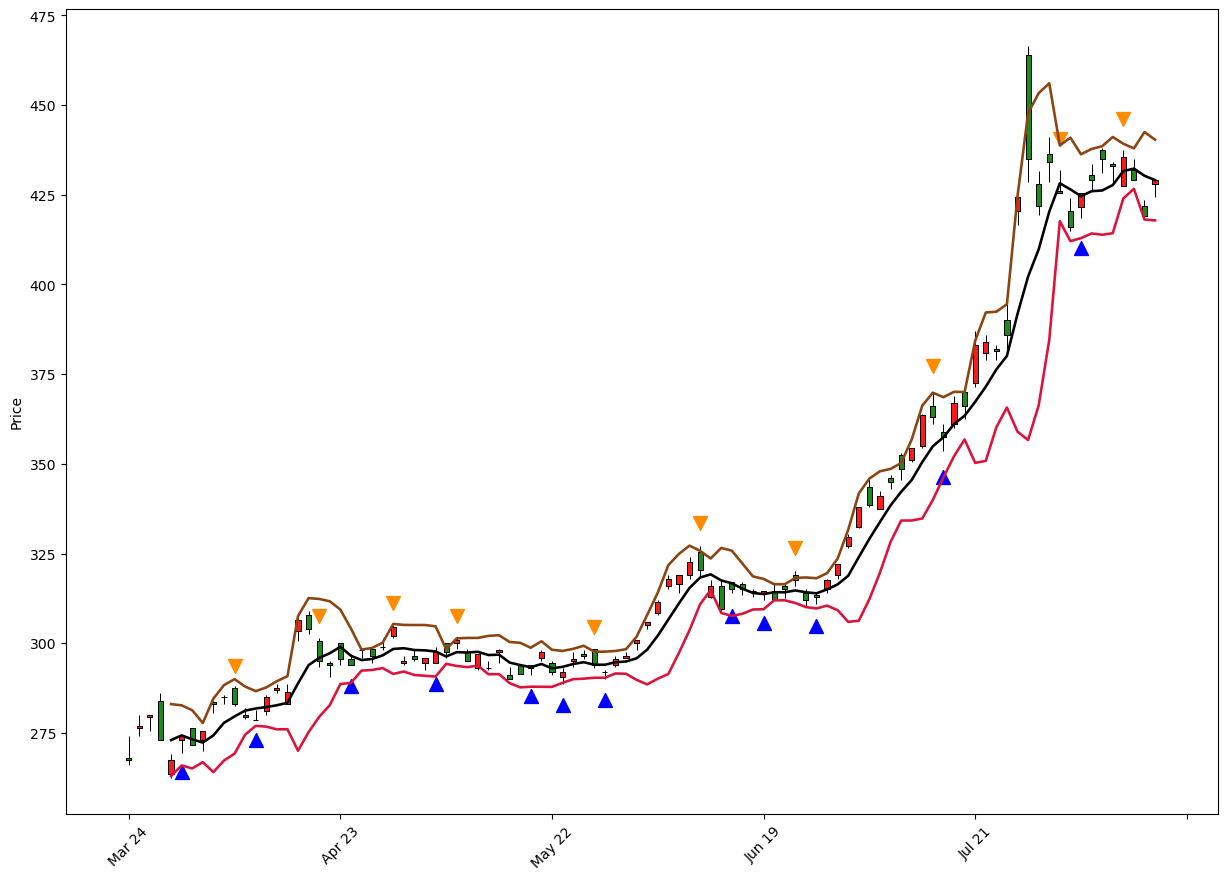

In [45]:
import numpy as np
import pandas as pd
import mplfinance as mpf
from talib import abstract

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks[50:148]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g', inherit = False)

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]

#Bollinger Bands
stock_BBands = stocks.copy() #複製資料
stock_BBands.columns = ['date', 'open', 'high', 'low', 'close', 'volume']    
aBBands = abstract.BBANDS(stock_BBands) #talib內建方法

upper_bound  = aBBands['upperband']
middle_bound = aBBands['middleband']
lower_bound  = aBBands['lowerband']
################################################################################################################################
#策略實現

#找出交易點
points_buy = [np.nan] * len(stocks)
points_sell = [np.nan] * len(stocks)

#買入點：昨日最高最低價平均小於middle bound，但今日最高最低價平均大於middle bound時
#賣出點：昨日最高最低價平均大於middle bound，但今日最高最低價平均小於middle bound時
for i in range(0, len(middle_bound) - 1):
    #直接打會讓程式碼太長，多宣告兩個變數方便觀看
    yesterday_avr = (stocks_low[i] + stocks_high[i]) / 2
    today_avr = (stocks_low[i + 1] + stocks_high[i + 1]) / 2
    if((yesterday_avr < middle_bound[i] and today_avr > middle_bound[i + 1])):
        #最低價 * 0.98 方便觀看
        points_buy[i] = stocks_low[i] * 0.98
    elif(yesterday_avr > middle_bound[i] and today_avr < middle_bound[i + 1]):
        #最高價 * 1.02 方便觀看
        points_sell[i] = stocks_high[i] * 1.02

#點狀圖 type = 'scatter'，markersize可以更改 marker大小
apds = [
        mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
        mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
        mpf.make_addplot(upper_bound, color = 'saddlebrown'),
        mpf.make_addplot(middle_bound, color = 'black'),
        mpf.make_addplot(lower_bound, color = 'crimson'),
       ]

mpf.plot(stock_BBands, **kwargs, addplot = apds)

支出： 37528402 元
收入： 39335168 元
淨收益： 1806766 元
投資報酬率： 4.81 %


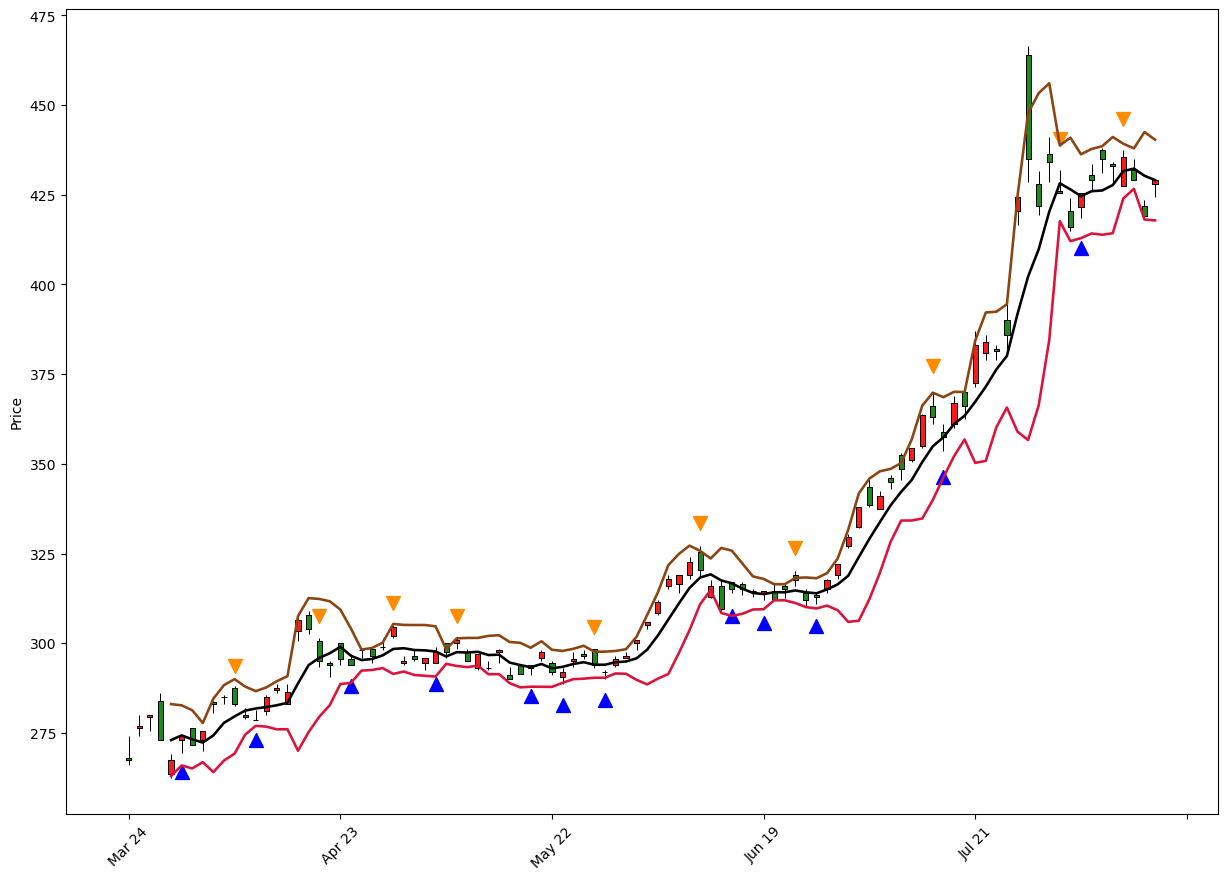

0         1      2      3         4         5
0     日期  買/賣(+/-)     價格  價格(稅)      實際花費      目前獲利
1   3/31       +10    274    274  -2743904  -2743904
2    4/9       -10    283    282  +2817477     73573
3   4/13       +10  278.5    279  -2788969  -2715396
4   4/21       -10    295    294  +2936946    221550
5   4/24       +10    294    294  -2944190  -2722640
6   4/30       -10  304.5    303  +3031526    308886
7    5/7       +10  297.5    298  -2979239  -2670353
8   5/11       -10    301    300  +2996681    326328
9   5/20       +10    294    294  -2944190  -2617862
10  5/25       +10    292    292  -2924161  -5542023
11  5/28       -20    294    293  +5853981    311958
12  5/29       +10    292    292  -2924161  -2612203
13  6/11       -10  320.5    319  +3190818    578615
14  6/16       +10    315    315  -3154489  -2575874
15  6/19       +10  314.5    315  -3149482  -5725356
16  6/24       -20  317.5    316  +6321901    596545
17  6/30       +10    313    313  -3134460  -2537915
18  7/15       -10    363    361  +3613937   1076022
19  7/16       +10  357.5    358  -3580094  -2504072
20  7/31       -10  425.5    424  +4236172   1732100
21   8/4       +10  425.5    426  -4261063  -2528963
22  8/10       -10  435.5    434  +4335729   1806766

In [34]:
import numpy as np
import pandas as pd
import mplfinance as mpf
from talib import abstract

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))

stocks = stocks[50:148]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g', inherit = False)

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]

#Bollinger Bands
stock_BBands = stocks.copy() #複製資料
stock_BBands.columns = ['date', 'open', 'high', 'low', 'close', 'volume']    
aBBands = abstract.BBANDS(stock_BBands) #talib內建方法

upper_bound  = aBBands['upperband']
middle_bound = aBBands['middleband']
lower_bound  = aBBands['lowerband']
################################################################################################################################
#策略實現

#找出交易點
points_buy = [np.nan] * len(stocks)
points_sell = [np.nan] * len(stocks)

#紀錄交易資訊
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]
temp_detail = []
unit = 10
stock = 0
gain = 0

#買入點：昨日最高最低價平均小於middle bound，但今日最高最低價平均大於middle bound時
#賣出點：昨日最高最低價平均大於middle bound，但今日最高最低價平均小於middle bound時
for i in range(0, len(middle_bound) - 1):
    yesterday_avr = (stocks_low[i] + stocks_high[i]) / 2
    today_avr = (stocks_low[i + 1] + stocks_high[i + 1]) / 2
    if((yesterday_avr < middle_bound[i] and today_avr > middle_bound[i + 1])):
        points_buy[i] = stocks_low[i] * 0.98
        #買入unit張股票
        stock += unit
        #計算目前獲利
        gain -= round(unit * stocks_close[i] * 1000 * 1.001425)
        #紀錄交易資訊
        temp_detail.append( str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day) )
        temp_detail.append('+' + str(unit))
        temp_detail.append(stocks_close[i])
        temp_detail.append(round(stocks_close[i] * 1.001425))
        temp_detail.append('-' + str(round(unit * stocks_close[i] * 1000 * 1.001425)))
        temp_detail.append(gain)
        detail.append(temp_detail)
        temp_detail = []
    elif(yesterday_avr > middle_bound[i] and today_avr < middle_bound[i + 1] and stock > 0):
        points_sell[i] = stocks_high[i] * 1.02
        #計算目前獲利
        gain += round(stock * stocks_close[i] * 1000 * 0.995575)
        #紀錄交易資訊
        temp_detail.append( str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day) )
        temp_detail.append('-' + str(stock))
        temp_detail.append(stocks_close[i])
        temp_detail.append(round(stocks_close[i] * 0.995575))
        temp_detail.append('+' + str(round(stock * stocks_close[i] * 1000 * 0.995575)))
        temp_detail.append(gain)
        detail.append(temp_detail)
        #股票全數賣出
        stock = 0
        temp_detail = []

#支出
cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4]))
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])

#總資訊
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")
        
apds = [
        mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
        mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
        mpf.make_addplot(upper_bound, color = 'saddlebrown'),
        mpf.make_addplot(middle_bound, color = 'black'),
        mpf.make_addplot(lower_bound, color = 'crimson'),
       ]

mpf.plot(stock_BBands, **kwargs, addplot = apds)

#交易資訊
detail = pd.DataFrame(detail)

detail

-------------------------------------------------------------------------------------------------------------------------------

# 2-5 RSI指標

## >>> 買入點：
### rsi線向下突破20 / rsi線持續在20以下

## >>> 賣出點：
### rsi線向下突破90

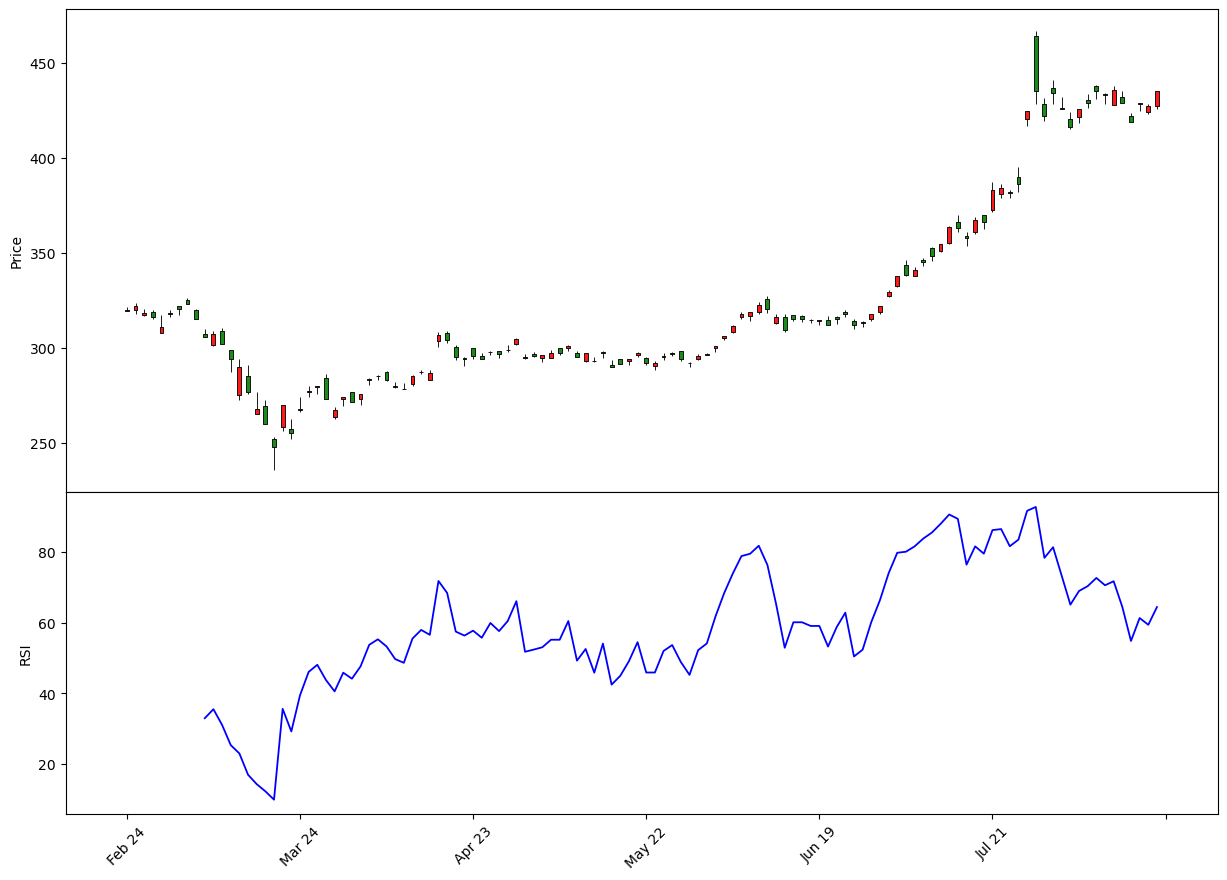

In [55]:
import pandas as pd
import mplfinance as mpf
import numpy as np
from talib import abstract

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks = stocks[30:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

#使用talib
stocks.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
rsiline = abstract.RSI(stocks, 9)

draw = [
            mpf.make_addplot(rsiline, panel = 1, color = 'blue', ylabel = 'RSI'),  
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (3, 2))

In [35]:
import pandas as pd
import mplfinance as mpf
import numpy as np
from talib import abstract

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks = stocks[30:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]

#使用talib
stocks.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
rsiLine = abstract.RSI(stocks, 9)

################################################################################################################################
#策略實現

#繪製買入賣出線 (for panel 1)
buyLine = []
sellLine = []
for i in range(0, len(rsiLine)):
    buyLine.append(20)
    sellLine.append(90)

#繪製點所使用的陣列
points_buy = [np.nan] * len(stocks)
points_sell = [np.nan] * len(stocks)

#買入點：rsi線向下突破20 / rsi線持續在20以下
#賣出點：rsi線向下突破90
for i in range(1, len(rsiLine)):
    if((rsiLine[i - 1] > 20 and rsiLine[i] < 20) or (rsiLine[i - 1] < 20 and rsiLine[i] < 20)):
        #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
        points_buy[i] = stocks_low[i] * 0.98
    if(rsiLine[i - 1] > 90 and rsiLine[i] < 90):
        #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
        points_sell[i] = stocks_high[i] * 1.02

draw = [
            mpf.make_addplot(points_buy, type = 'scatter', marker = '^', markersize = 60, color = 'blue'),
            mpf.make_addplot(points_sell, type = 'scatter', marker = 'v', markersize = 60, color = 'darkorange'),
            mpf.make_addplot(rsiLine, panel = 1, color = 'blue', ylabel = 'RSI', ylim = (0, 100)), 
            mpf.make_addplot(buyLine, panel = 1, color = 'green'),
            mpf.make_addplot(sellLine, panel = 1, color = 'red')
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (3, 2))

In [37]:
import pandas as pd
import mplfinance as mpf
import numpy as np
from talib import abstract

stocks = pd.read_csv('stocksTsmc_2020.csv')

stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks = stocks[30:150]

colorSet = mpf.make_marketcolors(up = 'r', down = 'g')

styleSet = mpf.make_mpf_style(marketcolors = colorSet)

kwargs = dict(type = 'candle', style = styleSet, figscale = 2)

stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]

#使用talib
stocks.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
rsiLine = abstract.RSI(stocks, 9)

################################################################################################################################
#策略實現

#繪製買入賣出線 (for panel 1)
buyLine = []
sellLine = []
for i in range(0, len(rsiLine)):
    buyLine.append(20)
    sellLine.append(90)

#繪製交易點所使用的陣列
points_buy = [np.nan] * len(stocks)
points_sell = [np.nan] * len(stocks)

#紀錄交易資訊
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]
temp_detail = []
unit = 10
stock = 0
gain = 0

#買入點：rsi線向下突破20 / rsi線持續在20以下
#賣出點：rsi線向下突破90
for i in range(1, len(rsiLine)):
    if((rsiLine[i - 1] > 20 and rsiLine[i] < 20) or (rsiLine[i - 1] < 20 and rsiLine[i] < 20)):
        points_buy[i] = stocks_low[i] * 0.98
        #買入unit張股票
        stock += unit
        #計算目前獲利
        gain -= round(unit * stocks_close[i] * 1000 * 1.001425)
        #紀錄交易資訊
        temp_detail.append( str(datetime.date(stocks['date'][i]).month) + '/' + str(datetime.date(stocks['date'][i]).day) )
        temp_detail.append('+' + str(unit))
        temp_detail.append(stocks_close[i])
        temp_detail.append(round(stocks_close[i] * 1.001425, 1))
        temp_detail.append('-' + str(round(unit * stocks_close[i] * 1000 * 1.001425)))
        temp_detail.append(gain)
        detail.append(temp_detail)
        temp_detail = []
        
    if(rsiLine[i - 1] > 90 and rsiLine[i] < 90 and stock > 0):
        points_sell[i] = stocks_high[i] * 1.02
        #計算目前獲利
        gain += round(stock * stocks_close[i] * 1000 * 0.995575)
        #紀錄交易資訊
        temp_detail.append( str(datetime.date(stocks['date'][i]).month) + '/' + str(datetime.date(stocks['date'][i]).day) )
        temp_detail.append('-' + str(stock))
        temp_detail.append(stocks_close[i])
        temp_detail.append(round(stocks_close[i] * 0.995575))
        temp_detail.append('+' + str(round(stock * stocks_close[i] * 1000 * 0.995575)))
        temp_detail.append(gain)
        detail.append(temp_detail)
        #股票全數賣出
        stock = 0
        temp_detail = []

#支出
cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4]))
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])

#總資訊
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")
        
draw = [
            mpf.make_addplot(points_buy, type = 'scatter', marker = '^', markersize = 60, color = 'blue'),
            mpf.make_addplot(points_sell, type = 'scatter', marker = 'v', markersize = 60, color = 'darkorange'),
            mpf.make_addplot(rsiLine, panel = 1, color = 'blue', ylabel = 'RSI', ylim = (0, 100)), 
            mpf.make_addplot(buyLine, panel = 1, color = 'green'),
            mpf.make_addplot(sellLine, panel = 1, color = 'red')
       ]

mpf.plot(stocks, **kwargs, addplot = draw, panel_ratios = (3, 2))

#交易資訊
detail = pd.DataFrame(detail)

detail

支出： 10539998 元
收入： 14455749 元
淨收益： 3915751 元
投資報酬率： 37.15 %


0         1      2      3          4          5
0    日期  買/賣(+/-)     價格  價格(稅)       實際花費       目前獲利
1  3/16       +10  276.5  276.9   -2768940   -2768940
2  3/17       +10    268  268.4   -2683819   -5452759
3  3/18       +10    260  260.4   -2603705   -8056464
4  3/19       +10    248  248.4   -2483534  -10539998
5  7/15       -40    363    361  +14455749    3915751

-------------------------------------------------------------------------------------------------------------------------------